In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from surprise.prediction_algorithms.matrix_factorization import NMF,SVD

In [191]:
dataset = pd.read_csv('ratings.csv')

### Question 1

In [192]:
sparsity = dataset.shape[0]/(dataset['movieId'].nunique() * dataset['userId'].nunique())

In [193]:
print(sparsity)

0.016439141608663475


### Question 2

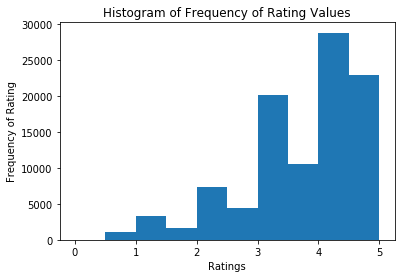

In [194]:
plt.hist(dataset['rating'],bins=np.arange(0, 5 + 0.5, 0.5))
plt.title('Histogram of Frequency of Rating Values')
plt.xlabel('Ratings')
plt.ylabel('Frequency of Rating')
plt.show()

### Question 3

In [196]:
movie_ids = dataset['movieId']
movie_ratings_dict = dict(Counter(movie_ids))

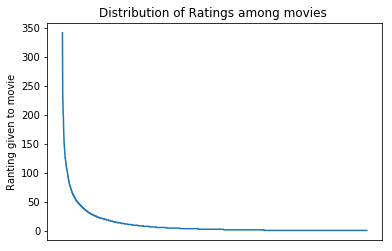

In [200]:
plt.plot(range(0,len(movie_ratings_dict.keys())), sorted(movie_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among movies ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ranting given to movie')
plt.show()

### Question 4

In [201]:
user_ids = dataset['userId']
user_ratings_dict = dict(Counter(user_ids))

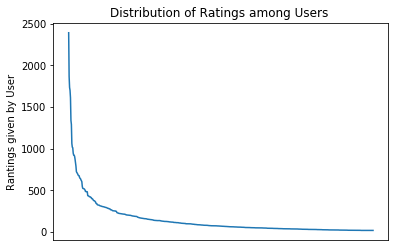

In [202]:
plt.plot(range(0,len(user_ratings_dict.keys())), sorted(user_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among Users ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Rantings given by User')
plt.show()

### Question 5

In [126]:
sum(sorted(user_ratings_dict.values(),reverse=True)[:100])

55141

### Question 6

In [203]:
id_var = (dataset[['movieId','rating']].groupby('movieId',as_index=False)).var().fillna(0)
id_var_dict = dict(zip(list(id_var['movieId']), id_var['rating']))
var_list = list(dataset[['movieId','rating']].groupby('movieId').var()['rating'])

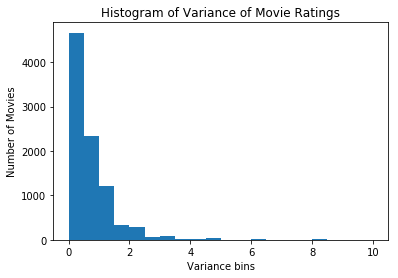

In [205]:
plt.hist(np.nan_to_num(var_list),bins=np.arange(min(var_list), max(var_list), 0.5))
plt.title('Histogram of Variance of Movie Ratings')
plt.ylabel('Number of Movies')
plt.xlabel('Variance bins')
plt.show()


In [177]:
def get_popular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    return [x for x in testset if x[1] in movie_ids]
def get_unpopular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    return [x for x in testset if x[1] in movie_ids]

def get_highvar(movie_ratings_dict, var_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    movieids = [x for x in high_variance_movieids if var_dict[x]>=2 ]
    return [x for x in testset if x[1] in movie_ids]
    

## 4.5 k-NN Collaborative Filtering

In [207]:
def do_kFold(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    sim_options = {'name': 'pearson_baseline'}
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for neigh in range_:
        print('Neighbors ',neigh)
        knn_model = KNNWithMeans( k=neigh, sim_options= sim_options)
        rmse_list=[]
        mae_list =[]
        #print(data_.)
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            knn_model.fit(trainset)
            predictions = knn_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[neigh]=sum(rmse_list)/len(rmse_list)
        mae_d[neigh]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d



In [220]:
def rmse_mae_plot(rmse_d,mae_d):
    plt.plot(list(rmse_d.keys()),list(rmse_d.values()))
    plt.show()
    plt.plot(list(mae_d.keys()),list(mae_d.values()))
    plt.show()

### Question 10

In [170]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
r_d,m_d = do_kFold(total_data, range(2,101,2),'notrim',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.91857346622
Mean mae 0.696952952828
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915352450332
Mean mae 0.694093153435
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915316771062
Mean mae 0.69459700979
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.916841683892
Mean mae 0.695690061325
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.914527391606
Mean mae 0.694420219417
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

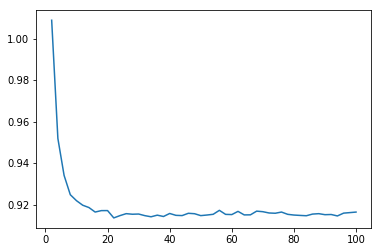

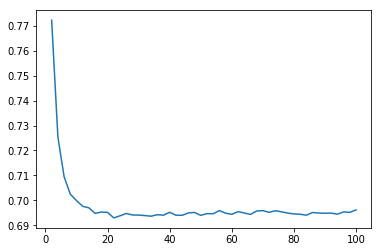

In [171]:
rmse_mae_plot(r_d,m_d)

### Question 11

 k value =20


 RMSE = 0.9146735

### Question 12,13,14

In [224]:
rp_d, mp_d = do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rup_d,mup_d =do_kFold(total_data, range(2,101,2),'up',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rhv_d,mhv_d =do_kFold(total_data, range(2,101,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.914993305814
Mean mae 0.693716064241
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912714337461
Mean mae 0.692132635646
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912857624726
Mean mae 0.69239764272
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912514426804
Mean mae 0.692073578881
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.9137762713
Mean mae 0.693287061631
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Est

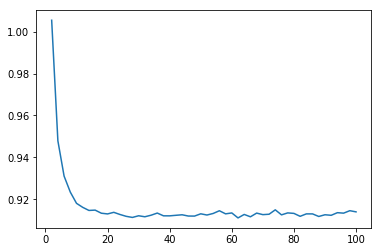

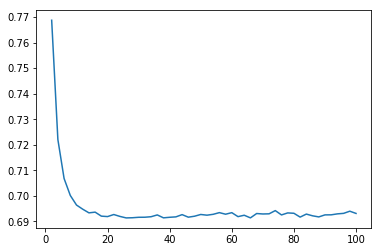

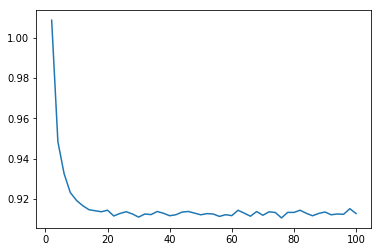

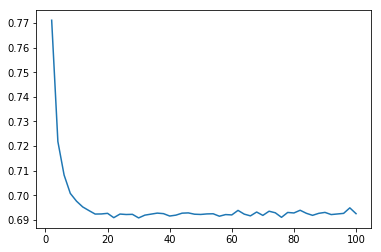

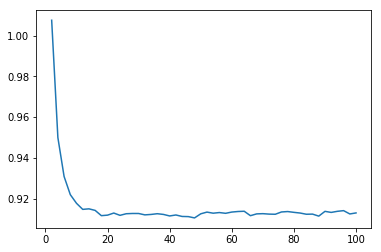

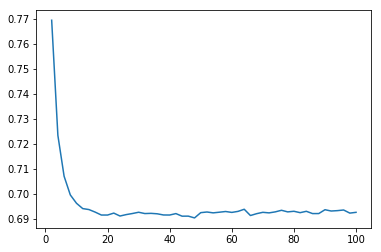

In [225]:
rmse_mae_plot(rp_d,mp_d)
rmse_mae_plot(rup_d,mup_d)
rmse_mae_plot(rhv_d,mhv_d)

## NNNMF

In [210]:
def NMF_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        nmf_model = NMF(n_factors = latent_factors)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            nmf_model.fit(trainset)
            predictions = nmf_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 17

In [211]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
nmf_rmse , nmf_mae = NMF_filter(total_data, range(2,51,8),'notrim',movie_ratings_dict) #replace 8 with 2

Number of Latent Factors :  2
Mean rmse 1.17886923077
Mean mae 0.997331581587
Number of Latent Factors :  10


KeyboardInterrupt: 

In [ ]:
rmse_mae_plot(nmf_rmse,nmf_mae)

### Question 18

TODO:

### Question 19 20 21

In [ ]:
nmf_rmse_p , nmf_mae_p = NMF_filter(total_data, range(2,51,8),'p',movie_ratings_dict) #replace 8 with 2
nmf_rmse_up , nmf_mae_up = NMF_filter(total_data, range(2,51,8),'up',movie_ratings_dict) #replace 8 with 2
nmf_rmse_hv , nmf_mae_hv = NMF_filter(total_data, range(2,51,8),'hv',movie_ratings_dict,id_var_dict= id_var_dict) #replace 8 with 2

In [ ]:
rmse_mae_plot(nmf_rmse_p,nmf_mae_p)
rmse_mae_plot(nmf_rmse_up,nmf_mae_up)
rmse_mae_plot(nmf_rmse_hv,nmf_mae_hv)

### Question 22

In [216]:
def plot_roc(fpr, tpr, roc_auc, threshold_value):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [217]:
def plot_roc_curves(testset,preds,thresholds_arr):
    for threshold_value in thresholds_arr:
        y_test = []
        y_preds = []
        for x in testset:
            if x[2] < threshold_value:
                y_test.append(0)
            else:
                y_test.append(1)
        for i in range(len(preds)):
            y_preds.append(preds[i][3])
        fpr, tpr, thresholds = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plot_roc(fpr,tpr, roc_auc,threshold_value)

In [218]:
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_nmf_model = NMF(n_factors = 18)
roc_nmf_model.fit(train_set)
preds = roc_nmf_model.test(test_set)

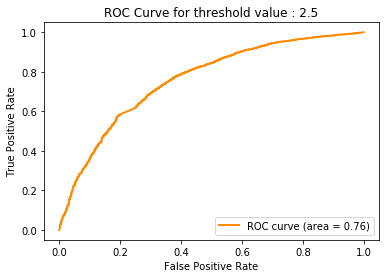

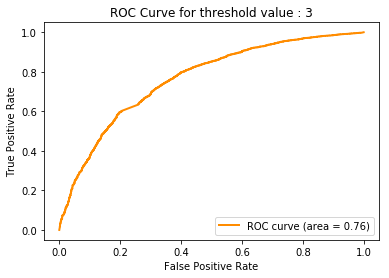

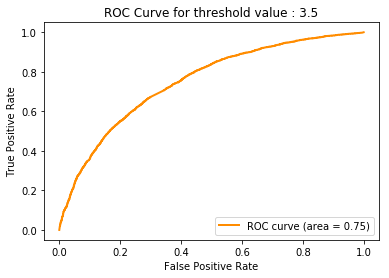

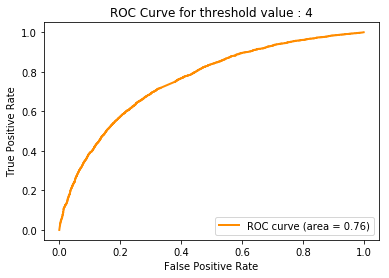

In [219]:
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

## Matrix Factorization with bias

In [ ]:
def SVD_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        svd_model = SVD(n_factors = latent_factors)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict, id_var_dict, testset)
            svd_model.fit(trainset)
            predictions = svd_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 24

In [ ]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
svd_rmse , svd_mae = SVD_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict)

In [ ]:
rmse_mae_plot(svd_rmse,svd_mae)

### Question 25

In [221]:
#TODO

### Question 26,27,28

In [ ]:
svd_rmse_p , svd_mae_p = SVD_filter(total_data, range(2,51,8),'p',movie_ratings_dict) #replace 8 with 2
svd_rmse_up , svd_mae_up = SVD_filter(total_data, range(2,51,8),'up',movie_ratings_dict) #replace 8 with 2
svd_rmse_hv , svd_mae_hv = SVD_filter(total_data, range(2,51,8),'hv',movie_ratings_dict, id_var_dict) #replace 8 with 2

In [ ]:
rmse_mae_plot(svd_rmse_p,svd_mae_p)
rmse_mae_plot(svd_rmse_up,svd_mae_up)
rmse_mae_plot(svd_rmse_hv,svd_mae_hv)

### Question 29

In [222]:
#TODO ROC

## Naive Collaborative filtering

In [223]:
def mean_rating(user):
    user_dataset = dataset.loc[dataset['userId'] == user]
    l = len(user_dataset)
    rating_sum = np.sum(user_dataset['rating'])
    return rating_sum/l